In [1]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("SalesData.csv")

In [3]:
conn = sqlite3.connect('sales_data.db')
df.to_sql("sales",conn,if_exists="replace",index=False)

240

In [4]:
pd.read_sql_query('PRAGMA table_info(sales)',conn)

,cid,name,type,notnull,dflt_value,pk
0,0,Transaction ID,INTEGER,0,None,0
1,1,Date,TEXT,0,None,0
2,2,Product Category,TEXT,0,None,0
3,3,Product Name,TEXT,0,None,0
4,4,Units Sold,INTEGER,0,None,0
5,5,Unit Price,INTEGER,0,None,0
6,6,Region,TEXT,0,None,0
7,7,Payment Method,TEXT,0,None,0


In [5]:
df_sql_1=pd.read_sql_query('SELECT "Product Name", SUM("Units Sold") AS total_qty, SUM("Units Sold"*"Units Price") AS revenue FROM sales GROUP BY "Product Name"',conn)
print(df_sql_1)

                                          Product Name  total_qty  revenue
0                                1984 by George Orwell          4        0
1                              Adidas 3-Stripes Shorts          5        0
2                         Adidas Essential Track Pants          3        0
3                       Adidas FIFA World Cup Football          3        0
4                  Adidas Originals Superstar Sneakers          4        0
..                                                 ...        ...      ...
227           Yeti Tundra Haul Portable Wheeled Cooler          1        0
228  Youth to the People Superfood Antioxidant Clea...          1        0
229                                  Zara Summer Dress          3        0
230                                      iPhone 14 Pro          2        0
231                               iRobot Braava Jet M6          1        0

[232 rows x 3 columns]


In [6]:
df_sql_3=pd.read_sql_query('SELECT "Product Category", SUM("Units Sold") AS Unit_per_Catagory FROM sales GROUP BY "Product Category"',conn)
print(df_sql_3)

  Product Category  Unit_per_Catagory
0  Beauty Products                 46
1            Books                114
2         Clothing                145
3      Electronics                 66
4  Home Appliances                 59
5           Sports                 88


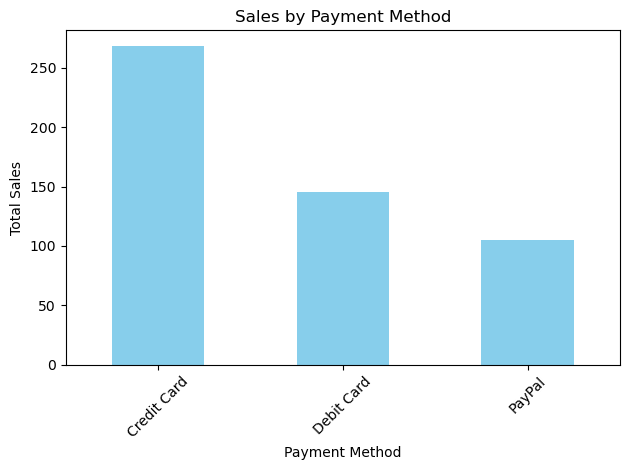

In [7]:
df.groupby('Payment Method')['Units Sold'].sum().plot(
    kind='bar',
    color='skyblue',
    rot=45
)
plt.title('Sales by Payment Method')
plt.xlabel('Payment Method')
plt.ylabel('Total Sales')
plt.tight_layout()
plt.savefig('Sales by Payment Method.png')
plt.show()

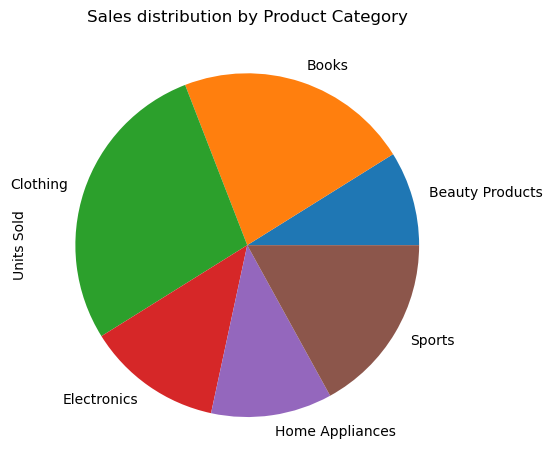

In [8]:
df.groupby('Product Category')['Units Sold'].sum().plot(
    kind='pie',
)
plt.title('Sales distribution by Product Category')
plt.tight_layout()
plt.savefig('Sales distribution by Product Category.png')
plt.show()

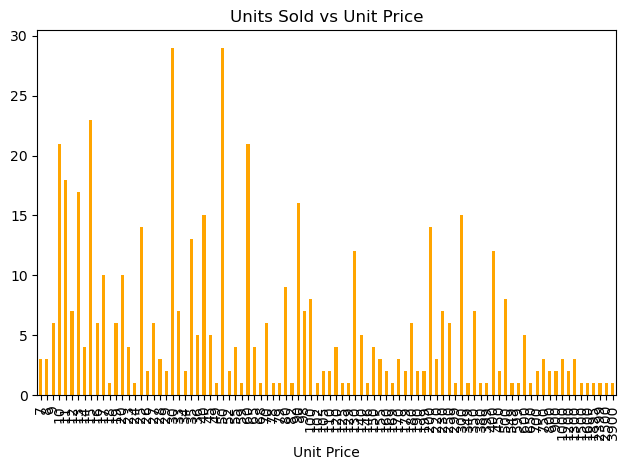

In [9]:
df.groupby('Unit Price')['Units Sold'].sum().plot(
    kind='bar',
    color='orange',
)
plt.title('Units Sold vs Unit Price')
plt.tight_layout()
plt.savefig('Units Sold vs Unit Price')
plt.show()